<a href="https://colab.research.google.com/github/chris-kehl/tensorflow_celsius_fahrenheit_converter/blob/main/Celsius_to_Fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Creating a tensorflow artificial neural network to convert celcius to fahrenheit. This from the Udacity tensorflow course. First tutorial they demonstrate when explaining how to use tensorflow and keras.

In [1]:
# import tensorflow and numpy
import tensorflow as tf
import numpy as np

We will have the inputs as celcius and fahrenheit

In [2]:
celsius_q = np.array([-273, -40, -10, 0, 8, 15, 22, 25, 30, 35, 37, 38, 40, 100, 180], dtype=float)
fahrenheit_a = np.array([-460, -40, 14, 32, 46,49, 72, 77, 86, 95, 99, 100, 104, 212, 356])

for i,c in enumerate(celsius_q):
    print("{} degrees Celsius = {} degrees fahrenheit".format(c, fahrenheit_a[i]))


-273.0 degrees Celsius = -460 degrees fahrenheit
-40.0 degrees Celsius = -40 degrees fahrenheit
-10.0 degrees Celsius = 14 degrees fahrenheit
0.0 degrees Celsius = 32 degrees fahrenheit
8.0 degrees Celsius = 46 degrees fahrenheit
15.0 degrees Celsius = 49 degrees fahrenheit
22.0 degrees Celsius = 72 degrees fahrenheit
25.0 degrees Celsius = 77 degrees fahrenheit
30.0 degrees Celsius = 86 degrees fahrenheit
35.0 degrees Celsius = 95 degrees fahrenheit
37.0 degrees Celsius = 99 degrees fahrenheit
38.0 degrees Celsius = 100 degrees fahrenheit
40.0 degrees Celsius = 104 degrees fahrenheit
100.0 degrees Celsius = 212 degrees fahrenheit
180.0 degrees Celsius = 356 degrees fahrenheit


Our features are the inputs, the labels are the output our model predicts.
the examples are a pair of inputs/outputs used during training.

The next step to our model is to create the layers.

In [3]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

In [4]:
model = tf.keras.Sequential([l0])

Assemble layers into the model

In [5]:
model = tf.keras.Sequential([
     tf.keras.layers.Dense(units=1, input_shape=[1])
])

Compile the models

In [6]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

Train the model by using the fit method

In [7]:
histroy = model.fit(celsius_q, fahrenheit_a, epochs=600, verbose=False)
print("Finished training the model")

Finished training the model


Display the training statistics


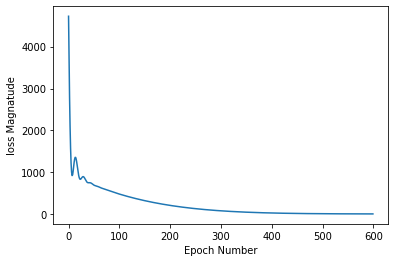

In [8]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('loss Magnatude')
plt.plot(histroy.history['loss'])



Execute the model and see what our prediction is 

In [9]:
print(model.predict([100.0]))

[[210.46655]]


Print the weights and see if they match the formula F = 1.8c + 32

In [10]:
print("These are the layer variables: {}".format(l0.get_weights()))


These are the layer variables: [array([[1.201259]], dtype=float32), array([0.], dtype=float32)]


Try an experiment with different layers


In [11]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])
l1 = tf.keras.layers.Dense(units=8)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=1000, verbose=False)
print("Finished Training the model for 500 epochs")
print(model.predict([100.0]))
print("model predicts that 100 degrees celcius is: {} degrees fahrenheit")
print("These are l0 variables {}".format(l0.get_weights()))
print("These are the l1 variables {}".format(l1.get_weights()))
print("These are the l2 variables {}".format(l2.get_weights()))

Finished Training the model for 500 epochs
[[211.4085]]
model predicts that 100 degrees celcius is: {} degrees fahrenheit
These are l0 variables [array([[-0.63139915]], dtype=float32), array([-4.29514], dtype=float32)]
These are the l1 variables [array([[-0.93783873,  0.02956397,  0.7887342 ,  0.33843648,  0.10362445,
        -0.01879049, -0.7330588 , -0.72502875]], dtype=float32), array([ 4.049339 , -1.7465234, -3.7921596, -3.6040218, -3.6273952,
       -0.3801401,  3.8151293,  4.237005 ], dtype=float32)]
These are the l2 variables [array([[ 0.8330866 ],
       [-0.06258301],
       [-1.007922  ],
       [-0.40019646],
       [-0.21378313],
       [-0.07026255],
       [ 0.9165634 ],
       [ 0.61601007]], dtype=float32), array([3.3648694], dtype=float32)]
